## Predicting Admission Chances - Regression Case Study

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('admission.csv')

### Understand the Data

In [6]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 9)

In [8]:
df.columns

Index(['Sno', 'Gre', 'Toefl', 'Rating', 'Sop', 'Lor', 'Cgpa', 'Research',
       'Chance'],
      dtype='object')

In [9]:
df.drop(columns = ['Sno'], inplace = True)

In [10]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data Visualization

#### *Univariate Analysis*

In [11]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

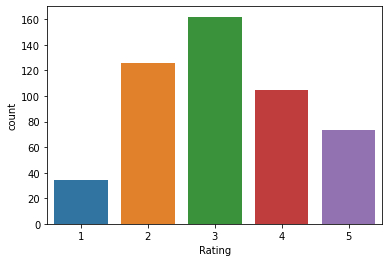

In [12]:
sns.countplot(x = 'Rating', data = df)

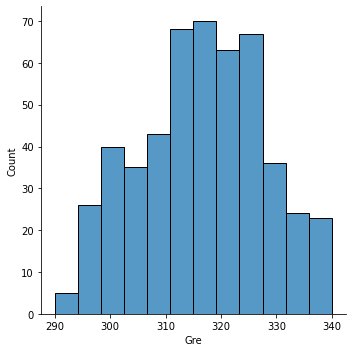

In [13]:
sns.displot(df['Gre'])

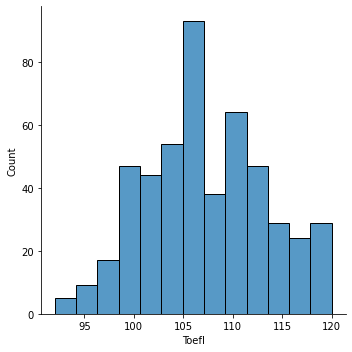

In [14]:
sns.displot(df['Toefl'])

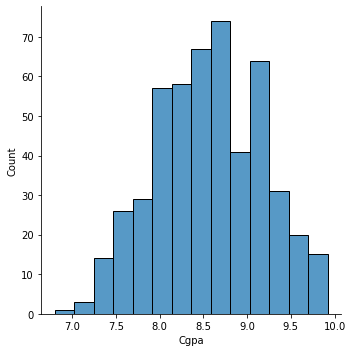

In [15]:
sns.displot(df['Cgpa'])

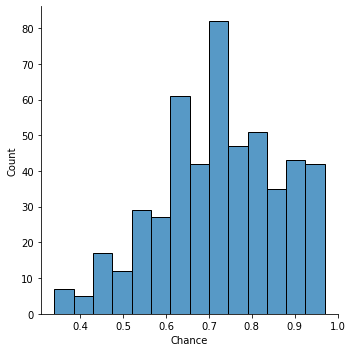

In [16]:
sns.displot(df['Chance'])

<AxesSubplot:>

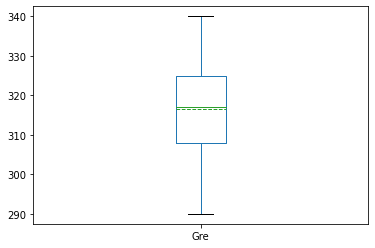

In [17]:
df['Gre'].plot.box(showmeans = True, meanline = True)

<AxesSubplot:>

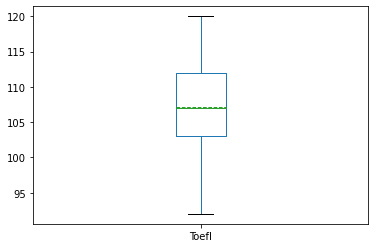

In [18]:
df['Toefl'].plot.box(showmeans = True, meanline = True)

<AxesSubplot:>

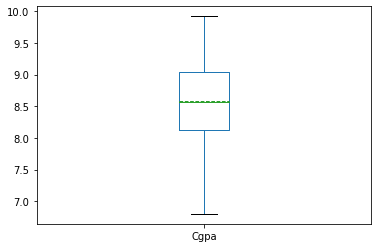

In [19]:
df['Cgpa'].plot.box(showmeans = True, meanline = True)

<AxesSubplot:xlabel='Research', ylabel='count'>

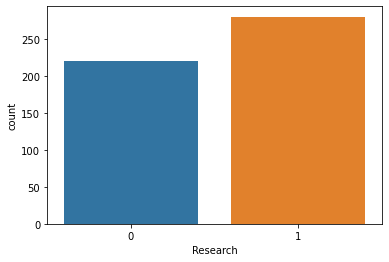

In [20]:
sns.countplot(x = 'Research', data = df)

#### *Bivariate Analysis*

<AxesSubplot:xlabel='Rating', ylabel='Gre'>

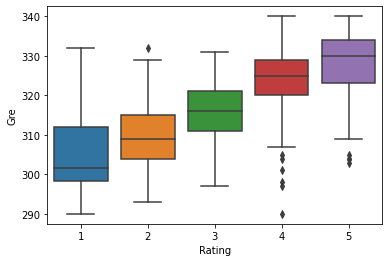

In [21]:
sns.boxplot(x = 'Rating', y = 'Gre', data = df)

<AxesSubplot:xlabel='Rating', ylabel='Toefl'>

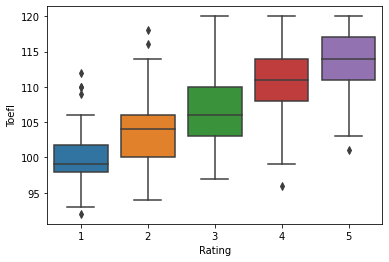

In [22]:
sns.boxplot(x = 'Rating', y = 'Toefl', data = df)

<AxesSubplot:xlabel='Rating', ylabel='Cgpa'>

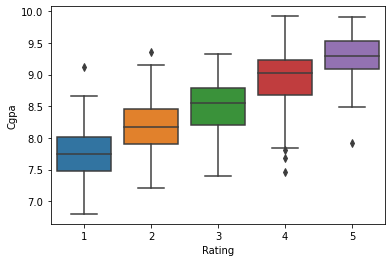

In [23]:
sns.boxplot(x = 'Rating', y = 'Cgpa', data = df)

<AxesSubplot:xlabel='Cgpa', ylabel='Gre'>

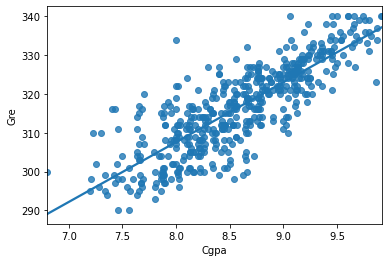

In [24]:
sns.regplot(x = 'Cgpa', y = 'Gre', data = df, ci = False)

<AxesSubplot:xlabel='Cgpa', ylabel='Toefl'>

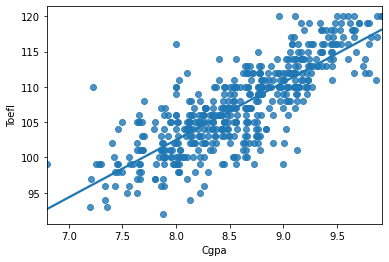

In [25]:
sns.regplot(x = 'Cgpa', y = 'Toefl', data = df, ci = False)

<AxesSubplot:xlabel='Gre', ylabel='Toefl'>

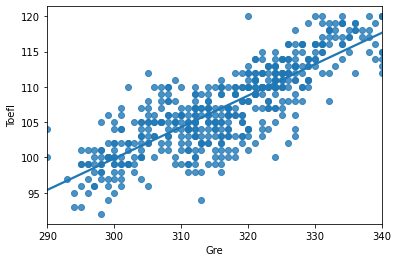

In [26]:
sns.regplot(x = 'Gre', y = 'Toefl', data = df, ci = False)

In [27]:
df[['Gre', 'Toefl', 'Cgpa']].corr()

,Gre,Toefl,Cgpa
Gre,1.000000,0.827200,0.825878
Toefl,0.827200,1.000000,0.810574
Cgpa,0.825878,0.810574,1.000000


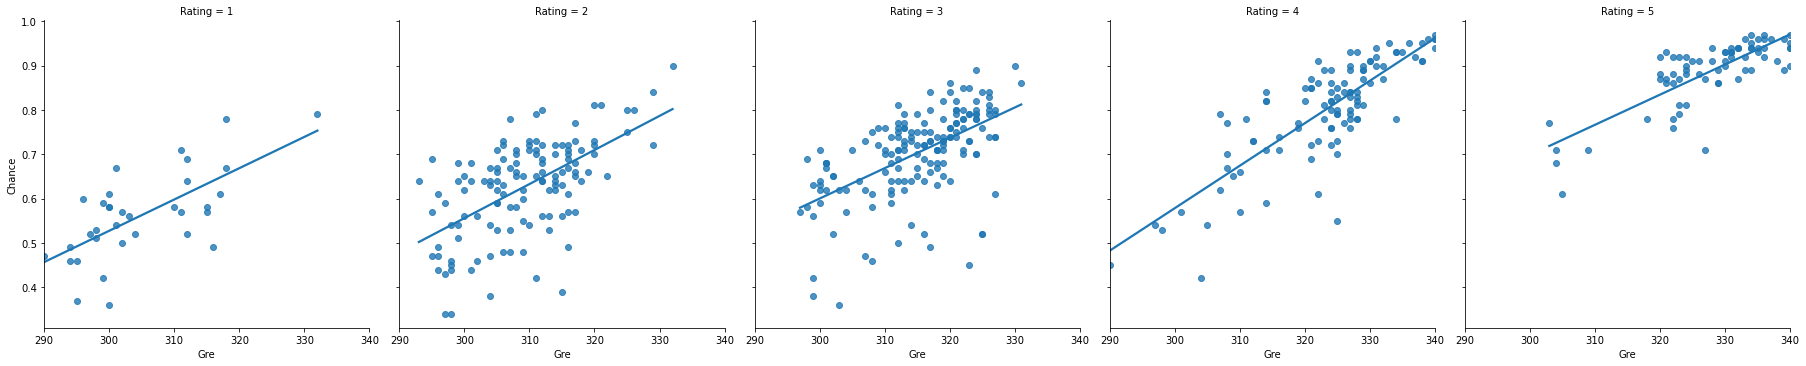

In [28]:
sns.lmplot(x = 'Gre', y = 'Chance', data = df, col = 'Rating', ci = False)

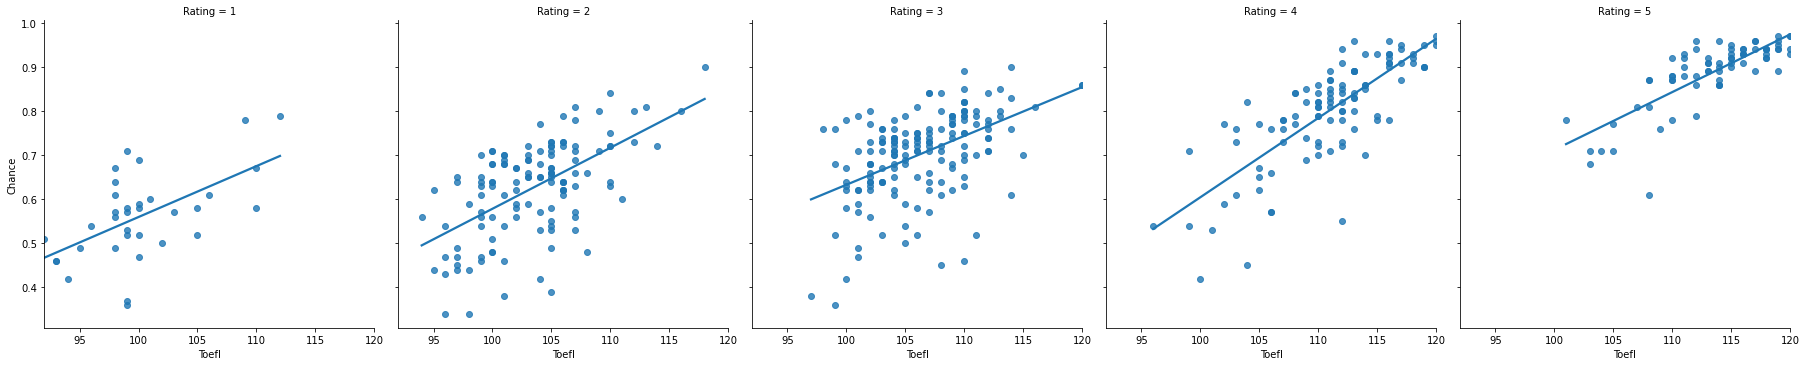

In [29]:
sns.lmplot(x = 'Toefl', y = 'Chance', data = df, col = 'Rating', ci = False)

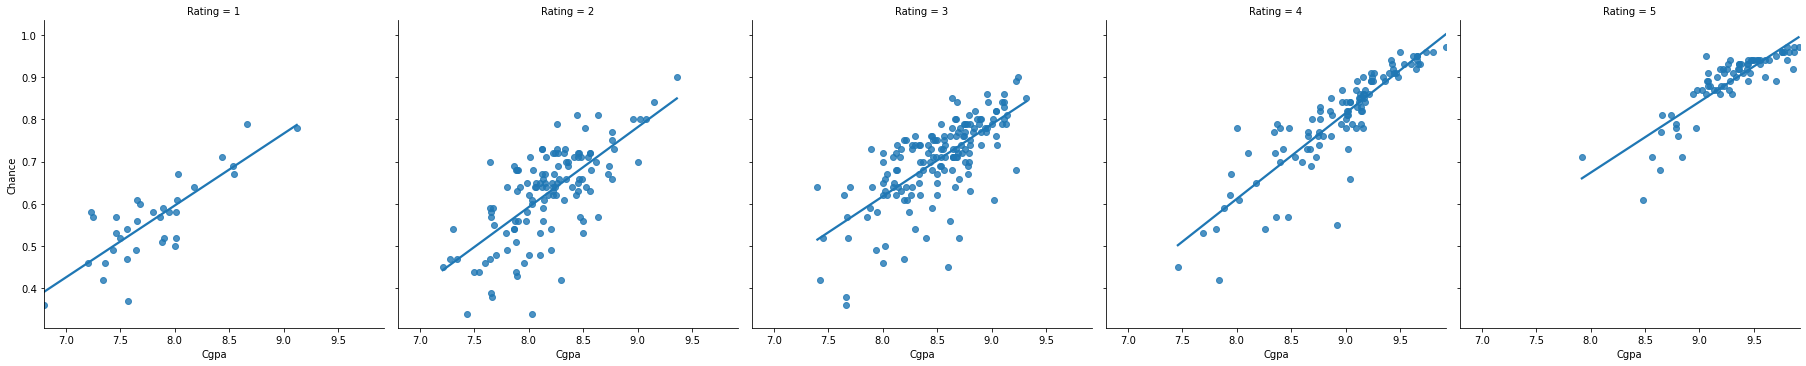

In [30]:
sns.lmplot(x = 'Cgpa', y = 'Chance', data = df, col = 'Rating', ci = False)

In [31]:
corr_matrix = df.corr()
corr_matrix

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [32]:
corr_matrix['Chance'].sort_values(ascending = False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

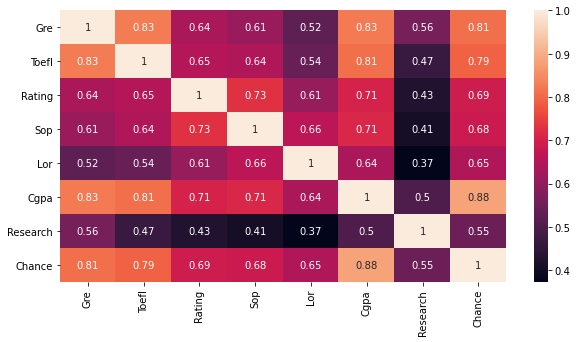

In [33]:
sns.heatmap(corr_matrix, annot = True)
plt.gcf().set_size_inches(10,5)

### Building Machine Learning Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
X = df[['Gre', 'Toefl', 'Cgpa']] # Input Data
Y = df['Chance'] * 100 # Output Data

In [46]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [47]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 3), (100, 3), (400,), (100,))

In [48]:
# Fit model or Train Model or Build model 
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [49]:
lr_model.coef_ # Slopes

array([ 0.2530053 ,  0.31789215, 14.25427517])

In [50]:
lr_model.intercept_

-164.24396080709764

In [41]:
gre = 320
tof= 110
cgpa = 9.2
chances = lr_model.intercept_ + gre * lr_model.coef_[0] + tof * lr_model.coef_[1] + cgpa * lr_model.coef_[2] 
print(chances)

82.82520356004494


### Evaluate Model with Trained Data

In [51]:
lr_model.score(X_train, Y_train)

0.8122343451664387

In [43]:
from sklearn.metrics import mean_squared_error

In [57]:
Y_pred = lr_model.predict(X_train)
print(type(Y_pred))

<class 'numpy.ndarray'>


In [58]:
np.floor(Y_pred[:10]) # Predicted

array([93., 76., 95., 60., 68., 59., 73., 84., 71., 73.])

In [59]:
Y_train[:10].values # Actual

array([91., 72., 96., 67., 75., 59., 72., 85., 71., 77.])

In [60]:
mse = mean_squared_error(Y_train,Y_pred)  # Actual and Predicted 
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

MSE   : 38.24616930456158
RMSE  : 6.184348737301413


In [61]:
result = pd.DataFrame({'Actual' : Y_train, 'Predicted' : Y_pred})

In [62]:
result.head()

,Actual,Predicted
107,91.0,93.310656
336,72.0,76.727945
71,96.0,95.491467
474,67.0,60.381835
6,75.0,68.506042


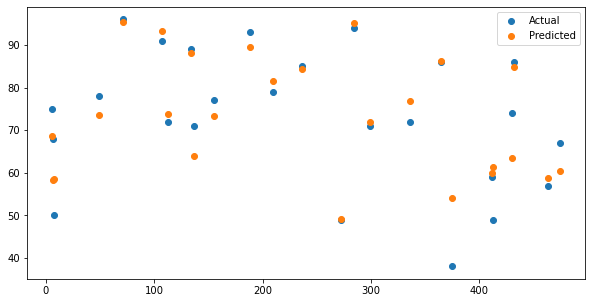

In [63]:
plt.scatter(result.index[:25],result['Actual'].head(25), label = 'Actual')
plt.scatter(result.index[:25],result['Predicted'].head(25), label = 'Predicted')
plt.legend()
plt.gcf().set_size_inches(10,5)

### Evaluate Model with Test Data

In [64]:
Y_pred = lr_model.predict(X_test)

In [65]:
lr_model.score(X_test, Y_pred)

1.0

In [66]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

0.763287824006934


In [67]:
res = pd.DataFrame({'Actual' : Y_test, 'Pred' : Y_pred})
res.head(10)

,Actual,Pred
90,64.0,62.802152
254,85.0,83.209435
283,80.0,79.119818
445,91.0,85.046086
461,68.0,60.222891
15,54.0,66.888863
316,54.0,55.297329
489,65.0,68.293116
159,52.0,55.296602
153,79.0,75.833340


In [68]:
mse = mean_squared_error(Y_test,Y_pred)
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

MSE   : 41.34118975674901
RMSE  : 6.4297114831654


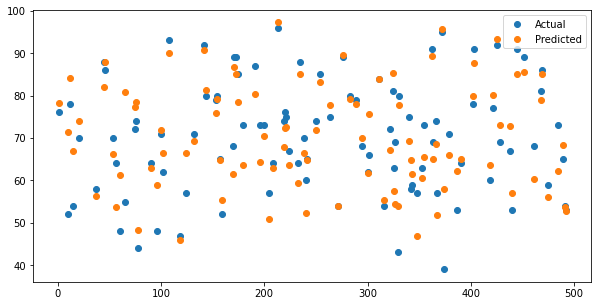

In [70]:
plt.scatter(res.index,res['Actual'], label = 'Actual')
plt.scatter(res.index,res['Pred'], label = 'Predicted')
plt.legend()
plt.gcf().set_size_inches(10,5)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


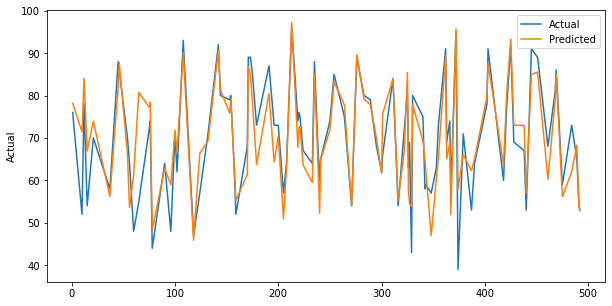

In [71]:
sns.lineplot(res.index, res['Actual'], label = 'Actual')
sns.lineplot(res.index, res['Pred'], label = 'Predicted')
plt.gcf().set_size_inches(10,5)

In [72]:
pd.to_pickle(lr_model, 'lr_model.pickle')